### Kernel PCA

<small>

- kernel PCA dimensionality reduction technique that extends standard PCA to handle <b>non-linear relationships</b> in the data
        
<br>

- handles non-linearly separable data effectively
- flexible kernel selection for different data types

<br>

<b>Applicatioins: </b>
- pattern recognition
- image processing
- data visualization
- anomaly (outlier) detection

<br>

<b>Common kernel functions:</b>
1. linear kernel
2. polynomial kernel
3. gaussian rbf kernel

<br>

<b>PCA: </b> linear, linearly separable, linear projection, basic dimensionality reduction

<b>Kernel PCA: </b> non-linear, non-linearly separable, non-linearly projection, complex datasets with non-linear relationships

</small>

Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [44]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Applying Kernel PCA

In [53]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf') # no of principal component --> no of extracted features
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

Training the Logistic Regression model on the Training set

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Making the Confusion Matrix <br>
- rows = actual classes
- columns = predicted classes

```
cm = [
    [a0_p0  a0_p1  a0_p2]
    [a1_p0  a1_p1  a1_p2]
    [a2_p0  a2_p1  a2_p2]
]
```

<small>

1. row 0: actual class 0
    - a0_p0 intances were correctly predicted as class 0
    - a0_p1 intances were misclassified predicted as class 1
    - a0_p2 intances were misclassified predicted as class 2

    <br>

2. row 1: actual class 1
    - a1_p0 intances were misclassified predicted as class 0
    - a1_p1 intances were correctly predicted as class 1
    - a1_p2 intances were misclassified predicted as class 2

    <br>

3. row 2: actual class 2
    - a2_p0 intances were misclassified predicted as class 0
    - a2_p1 intances were misclassified predicted as class 1
    - a2_p2 intances were correctly predicted as class 2
    
    <br>

With respect to 100 test case --> percentage

</small>

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

Visualizing the Training set results <br>

<small>

Why Principal component range [-4, 4]?
- after standardization,
    - 68% fall between [-1, 1]
    - 95% fall between [-2, 2]
    - 99.7% fall between [-3, 3]

After min-1  and  max+1 ---> [-4, 4]

</small>

C:\Users\HP\AppData\Local\Temp\ipykernel_18364\3362470462.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


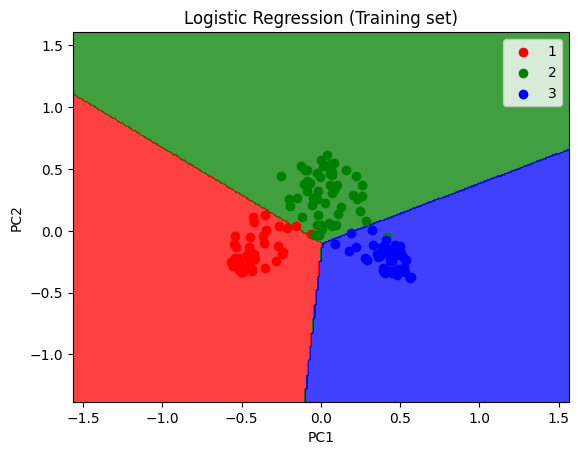

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
    )

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set ==j, 0],
        X_set[y_set == j, 1], 
        c = ListedColormap(('red', 'green', 'blue'))(i), label=j
        )

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # pc --> principal component 1
plt.ylabel('PC2') # pc --> principal component 2
plt.legend()
plt.show()

Visualizing the Test set results

C:\Users\HP\AppData\Local\Temp\ipykernel_18364\3974719505.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


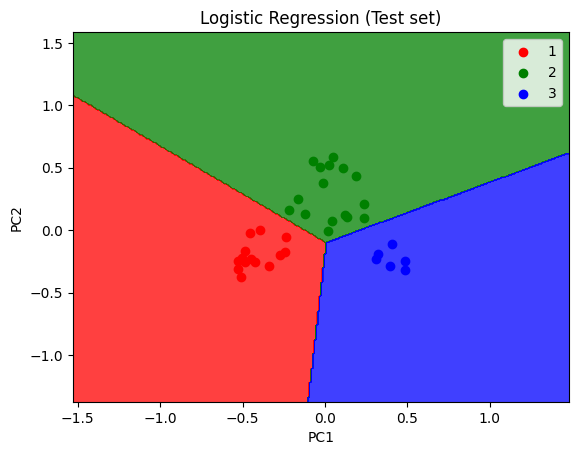

In [51]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
    )

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set ==j, 0],
        X_set[y_set == j, 1], 
        c = ListedColormap(('red', 'green', 'blue'))(i), label=j
        )

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # pc --> principal component 1
plt.ylabel('PC2') # pc --> principal component 2
plt.legend()
plt.show()